In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv("../data/BostonHousing.csv")
# Handle missing values (if any)
df_cleaned = df.dropna()

# No categorical variables in this dataset, so no encoding is needed

# Normalize/standardize numerical features
features = df_cleaned.drop("medv", axis=1)
target = df_cleaned["medv"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [21]:
# Create new features
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


df_cleaned['rm_lstat'] = df_cleaned['rm'] * df_cleaned['lstat']
df_cleaned['age_b'] = df_cleaned['age'] * df_cleaned['b']
df_cleaned['tax_crim'] = df_cleaned['tax'] / (df_cleaned['crim'] + 1)

# Re-prepare features and target with new features
features_fe = df_cleaned.drop("medv", axis=1)
target_fe = df_cleaned["medv"]

features_fe_scaled = scaler.fit_transform(features_fe)
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(features_fe_scaled, target_fe, test_size=0.2, random_state=42)

# Retrain model
lr_fe = LinearRegression()
lr_fe.fit(X_train_fe, y_train_fe)

# Hyperparameter tuning using Ridge regression with cross-validation
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_fe, y_train_fe)

best_ridge = grid_search.best_estimator_
y_pred_fe = best_ridge.predict(X_test_fe)
print("\nFeature Engineered Model Evaluation (Ridge with Tuning):")
print("Best Alpha:", grid_search.best_params_['alpha'])

# Evaluate new model
y_pred_fe = lr_fe.predict(X_test_fe)
mse_fe = mean_squared_error(y_test_fe, y_pred_fe)
r2_fe = r2_score(y_test_fe, y_pred_fe)

print(f"Mean Squared Error (MSE): {mse_fe:.2f}")
print(f"R-squared (R²): {r2_fe:.2f}")



Feature Engineered Model Evaluation (Ridge with Tuning):
Best Alpha: 0.1
Mean Squared Error (MSE): 16.51
R-squared (R²): 0.77


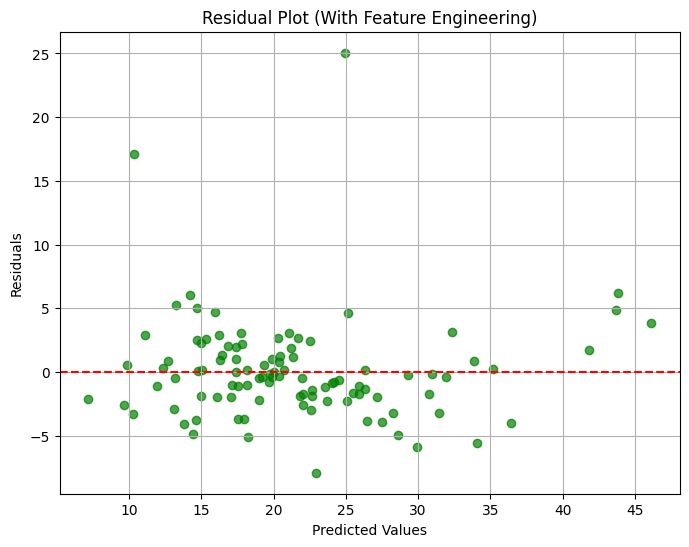

In [22]:
# Residual plot
residuals_fe = y_test_fe - y_pred_fe
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_fe, residuals_fe, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (With Feature Engineering)")
plt.grid(True)
plt.show()